In [1]:
import numpy as np
x_corners = [308.95371246337891, 309.0383415222168, 309.03308486938477, 308.94844436645508]
y_corners = [47.892280578613281, 47.895843505859375, 47.951824188232422, 47.9482421875]
p = [9.7243155633092044, 5.9823295715923104, 13.009727980188202, 13.010400780508215]
lon_in = 309.03201293945312
lat_in = 47.949508666992188

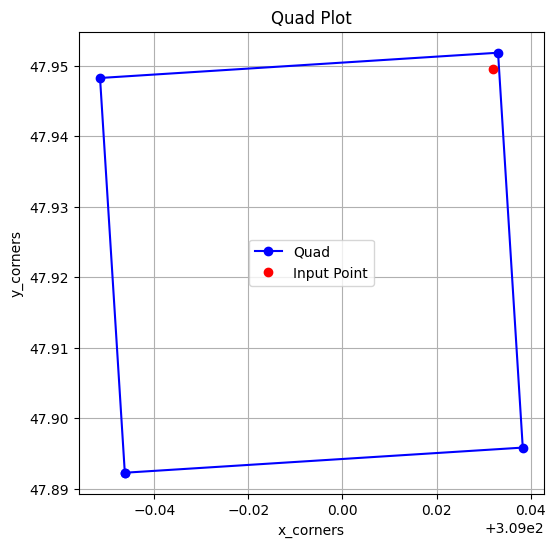

In [2]:
import matplotlib.pyplot as plt

# Close the quad by repeating the first point
x_quad = x_corners + [x_corners[0]]
y_quad = y_corners + [y_corners[0]]

plt.figure(figsize=(6,6))
plt.plot(x_quad, y_quad, 'b-', marker='o', label='Quad')
plt.plot(lon_in, lat_in, 'ro', label='Input Point')
plt.xlabel('x_corners')
plt.ylabel('y_corners')
plt.title('Quad Plot')
plt.grid(True)
plt.legend()
plt.show()

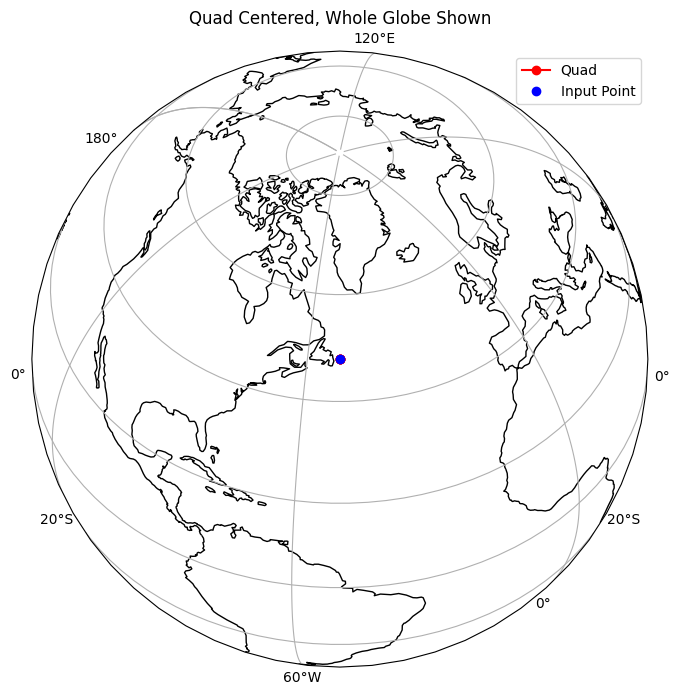

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Center on the mean of your quad, but show the whole globe
central_lon = np.mean(x_corners)
central_lat = np.mean(y_corners)

plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=central_lon, central_latitude=central_lat))
ax.set_global()  # Ensures the whole globe is visible
ax.coastlines()
ax.gridlines(draw_labels=True)

# Plot quad
ax.plot(x_quad, y_quad, 'ro-', transform=ccrs.PlateCarree(), label='Quad')
ax.plot(lon_in, lat_in, 'bo', transform=ccrs.PlateCarree(), label='Input Point')

plt.title('Quad Centered, Whole Globe Shown')
plt.legend()
plt.show()

In [4]:
import xarray as xr
ocean_geom = xr.open_dataset('ocean_geometry.nc')
geolat = ocean_geom['geolat'].values
geolon = ocean_geom['geolon'].values
print('geolat shape:', geolat.shape)
print('geolon shape:', geolon.shape)
res = xr.open_dataset('cesm3-dart-test-03.mom6.r.2015-01-08-00000._0001.nc', decode_times=False).isel(Time=0)
thick = res['h'].values
print('thick shape:', thick.shape)

geolat shape: (780, 740)
geolon shape: (780, 740)
thick shape: (65, 780, 740)


In [15]:
Ffour_ilons = [571, 572, 572, 571]
Ffour_ilats = [596, 596, 597, 597]
four_ilons = [x - 1 for x in Ffour_ilons]  # Adjusting for zero-based indexing
four_ilats = [y - 1 for y in Ffour_ilats]  # Adjusting for zero-based indexing
for i in range(4):
    print(f"geolon[{four_ilats[i]}, {four_ilons[i]}]:", geolon[four_ilats[i], four_ilons[i]]+360)  # Adjusting longitude to be within [0, 360)
for i in range(4):
    print(f"geolat[{four_ilats[i]}, {four_ilons[i]}]:", geolat[four_ilats[i], four_ilons[i]])
for layer in range(65):  # Assuming 'h' has a first dimension for layers
    print(f"Layer {layer}:")
    for i in range(4):
        print(f"thick[{layer}, {four_ilats[i]}, {four_ilons[i]}]:", thick[layer, four_ilats[i], four_ilons[i]])

geolon[595, 570]: 308.9537118713056
geolon[595, 571]: 309.0383416299276
geolon[596, 571]: 309.033084566724
geolon[596, 570]: 308.9484438374352
geolat[595, 570]: 47.892280284967505
geolat[595, 571]: 47.89584455693899
geolat[596, 571]: 47.951824110872344
geolat[596, 570]: 47.948240897676556
Layer 0:
thick[0, 595, 570]: 2.4899143082022475
thick[0, 595, 571]: 2.489593250375246
thick[0, 596, 571]: 2.4903767190252917
thick[0, 596, 570]: 2.4905055092856645
Layer 1:
thick[1, 595, 570]: 2.4899143082022306
thick[1, 595, 571]: 2.489593250375237
thick[1, 596, 571]: 2.490376719025306
thick[1, 596, 570]: 2.4905055092856445
Layer 2:
thick[2, 595, 570]: 2.4899143082022306
thick[2, 595, 571]: 2.489593250375237
thick[2, 596, 571]: 2.4903767190253054
thick[2, 596, 570]: 2.490505509285645
Layer 3:
thick[3, 595, 570]: 2.4899143082022306
thick[3, 595, 571]: 2.489593250375238
thick[3, 596, 571]: 2.4903767190253063
thick[3, 596, 570]: 2.490505509285643
Layer 4:
thick[4, 595, 570]: 2.7588250534880703
thick[4, 

In [6]:
print(x_corners)
print(y_corners)

[308.9537124633789, 309.0383415222168, 309.03308486938477, 308.9484443664551]
[47.89228057861328, 47.895843505859375, 47.95182418823242, 47.9482421875]


In [16]:
from wrap_interp import wrap_interp_mod

# Define input values
lon = np.float64(lon_in)  # Interpolation point longitude (degrees)
lat = np.float64(lat_in)  # Interpolation point latitude (degrees)

#ic = 3
#lon = np.float64(x_corners[0])  # Using the first corner for interpolation
#lat = np.float64(y_corners[0])  # Using the first corner for interpolation
#print(f"p values: {p[0]}")

x_corners = np.array(x_corners, dtype=np.float64)
y_corners = np.array(y_corners, dtype=np.float64)
p = np.array(p, dtype=np.float64)  # Values at the quadrilateral corners

# Prepare output variable
expected_obs = np.zeros(1, dtype=np.float64)

# this call is so init location_mod is called, and does all its print outs
expected_obs = wrap_interp_mod.quad_bilinear_interp_f2py(
        lon, lat, x_corners, y_corners, p
)

print(f"Interpolated value at ({lon}, {lat}): {expected_obs}")

Interpolated value at (309.0320129394531, 47.94950866699219): 12.733630085363984
 large interp residual            1   9.7243155660006835        9.7243155633092044        2.6914790396403987E-009
 large interp residual            2   5.9823295728080188        5.9823295715923104        1.2157084228192616E-009
 large interp residual            3   13.009727982133615        13.009727980188202        1.9454127198059723E-009
 large interp residual            4   13.010400782235990        13.010400780508215        1.7277752561994930E-009
